# Case de Ciência de Dados

## Descrição do dataset

Para este case foi utilizado o dataset `Electricity ID=150` disponível no [OpenML](https://www.openml.org/search?type=data&sort=runs&id=151&status=active).

<p align='justify'>O `Electricity` é um dataset descrito por M. Harries e analisado por J. Gama (ver artigos abaixo). Esses dados foram coletados do mercado de eletricidade australiano de Nova Gales do Sul. Nesse mercado, os preços não são fixos e são afetados pela demanda e oferta do mercado. Eles são definidos a cada cinco minutos. As transferências de eletricidade de/para o estado vizinho de Victoria foram feitas para aliviar as flutuações.</p>

<p align='justify'>O conjunto de dados (originalmente denominado ELEC2) contém 45.312 instâncias datadas de 7 de maio de 1996 a 5 de dezembro de 1998. Cada exemplo do conjunto de dados refere-se a um período de 30 minutos, ou seja, há 48 instâncias para cada período de um dia. Cada exemplo no conjunto de dados tem 5 campos, o dia da semana, o carimbo de hora, a demanda de eletricidade de Nova Gales do Sul, a demanda de eletricidade de Victoria, a transferência de eletricidade programada entre estados e o rótulo da classe. O rótulo da classe identifica a mudança do preço (UP ou DOWN) em New South Wales em relação a uma média móvel das últimas 24 horas (e remove o impacto das tendências de preços de longo prazo).</p>

Os dados foram normalizados por A. Bifet.

## Descriçao dos Dados

| Nome        | Descrição                                                              | Range                            | Tipo
| --          | --                                                                     | --                               | --
| Date        | Data entre 7 de maio de 1996 a 5 dezembro de 1998.                     | Normalizado entre 0 e 1          | Numérico
| Day         | Dia da semana                                                          | Range entre 1 e 7                | Categórico
| Period      | Hora da medição (1-48) em intervalos de meia hora ao longo de 24 horas.| Normalizado entre 0 e 1          | Numérico
| NSWprice    | Preço da eletricidade em New South Wales                               | Normalizado entre 0 e 1          | Numérico
| NSWdemand   | Demanda de eletricidade em New South Wales                             | Normalizado entre 0 e 1          | Numérico
| VICprice    | Preço da eletricidade em Victoria                                      | Normalizado entre 0 e 1          | Numérico
| VICdemand   | Demanda de eletricidade em Vicoria                                     | Normalizado entre 0 e 1          | Numérico
| transfer    | Transferência programa de entricidade entre os dois estados            | Normalizado entre 0 e 1          | Numérico
| class(target)| Preço da eletricidade em NSW acima/abaixo da média de 24 horas        | 1 (Acima/UP) ou 0 (abaixo/DOWN)  | Numérico

## Artigos
M. Harries. [Splice-2 comparative evaluation: Electricity pricing](https://citeseerx.ist.psu.edu/viewdoc/download;jsessionid=BCB2570AC299719CEA236621B98F4387?doi=10.1.1.12.9405&rep=rep1&type=pdf). Technical report, The University of South Wales, 1999.</br>
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. [Learning with drift detection](https://dl.acm.org/doi/abs/10.1145/2523813). In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

## Objetivo

A tarefa de aprendizagem é construir um classificador que melhor identifique a classe de exemplos não vistos anteriormente.

## Implementação da solução do problema

### Importação das bibliotecas necessárias

In [2]:
from sklearn import datasets as ds
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Leitura do dataset

In [3]:
df = ds.fetch_openml(data_id=151, as_frame=True, return_X_y=True)                # Carrega o dataset a partir do repositório do OpenML
df = pd.concat(df, axis=1).assign(target=lambda x: (x['class'] == 'UP') * 1)     # Adiciona a coluna "class" com as classes UP e DOWN

## Explorando o dataset


<p align='justify'>Explorar o conjunto é uma importante etapa do processo de construção de um modelo de Machine Learning. É nesta etapa que idenficamos possíveis incosistências nos dados fornecidos tais como: outliers, dados faltantes, informações incorretas. Esta análise também nos permite identificar padrões nos dados que já podem gerar conhecimentos úteis para o negócio.</br>

Informações gerais do dataset</br>
<p align='justify'>Uilizando o comando `info`são exibidas as caraceteríscas dos dados do dataset como: tipo dos dados, número de colunas, nomes das colunas, total de linhas, total de valores nulos em cada coluna.</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   date       45312 non-null  float64 
 1   day        45312 non-null  category
 2   period     45312 non-null  float64 
 3   nswprice   45312 non-null  float64 
 4   nswdemand  45312 non-null  float64 
 5   vicprice   45312 non-null  float64 
 6   vicdemand  45312 non-null  float64 
 7   transfer   45312 non-null  float64 
 8   class      45312 non-null  category
 9   target     45312 non-null  int32   
dtypes: category(2), float64(7), int32(1)
memory usage: 2.7 MB


O resultado anterior mostra que não há dados faltantes.</br>
<p justify='align'>A seguir o comando `describe` mostra algumas das principais métricas estatísticas das variáveis numéricas do conjunto de dados: média, mediana, desvio padrão, máximo, mínimo, 1º quartil (25%), 3º quartil (75%). Este é um comando útil para entender a distribuição dos dados.</p>
<p justify='align'>Como date e period foram registrados como numéricas o <code>describe</code> também acabou realizando o cálculo para tais métricas, embora não faça sentido. Vê-se que a variável <strong>vicprice</strong> é a de menor variabilidade e valor médio do conjunto. Como todas as variáveis numéricas já estão normalizadas, na mesma ordem de grandeza, é dispensável a normalização dos dados em etapas posteriores da construção do modelo.</p>

In [5]:
df.describe()

,date,period,nswprice,nswdemand,vicprice,vicdemand,transfer,target
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526,0.424545
std,0.340308,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373,0.494279
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912,0.000000
50%,0.456329,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912,0.000000
75%,0.880547,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualizando as primeiras linhas do dataset para ter-se noção do conteúdo.

In [7]:
df.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class,target
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN,0


### Análise descritiva dos dados de eletricidade para New South Wales

<p align='justify'>Como o principal objetivo do case está relacionado ao consumo de eletricidade de New South Wales a seguir é realizada uma análise das variáveis relacionadas. O objetivo aqui é identificar padrões que possam existir nas séries de dados.<p>
<p align='justify'>O primeiro gráfico mostra a demanda de eletricide em New Soth Wales ao longo do dia.</p> 

In [109]:
# Definição da função para gerar os gráficos de linha
def grafico_linhas(x, y, title, xlabel, ylabel, minx=0, maxx=24, stepx=1, maxy=1.0, stepy=0.01):
    '''
        Função para gerar gráficos de linhas
        Args:
            y (string): Nome da coluna do dataset que estará no eixo y do gráfico
            title (string): Título do gráfico
            ylabel (string): Label do eixo y
            maxy (float): Limite máximo do eixo y
            stepy (float): Intervalo entre as marcações do eixo y
    '''
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    sns.lineplot(x, y=y, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_yticks(np.arange(0, maxy + stepy, stepy).round(2))
    ax.set_yticklabels(np.arange(0, maxy + stepy, stepy).round(2), fontsize=12)
    ax.set_xticks(np.arange(minx, maxx + stepx, stepx))
    ax.set_xticklabels(np.arange(minx, maxx + stepx, stepx), fontsize=12)
    ax.set_xlim(minx, maxx)
    ax.spines[['top', 'right']].set_visible(False)
    plt.show()

Plot do gráfico da variação da demanda de energia ao longo do dia.

c:\Users\duart\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


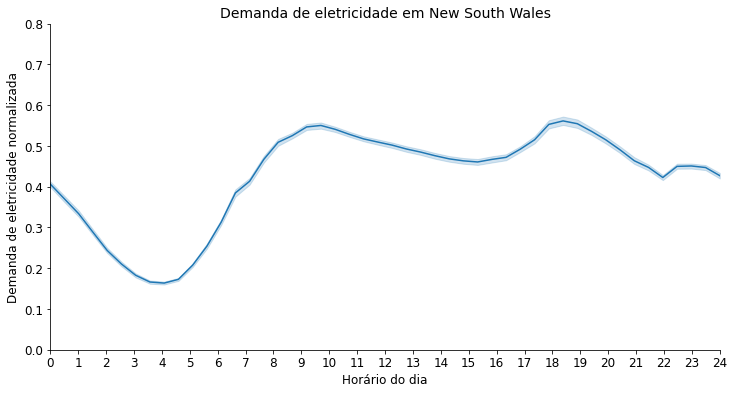

In [117]:
titulo = 'Demanda de eletricidade em New South Wales'
ylabel = 'Demanda de eletricidade normalizada'
xlabel = 'Horário do dia'
maxy = .8
stepy = .1
x = df['period']*24
y = df['nswdemand']

grafico_linhas(x, y, titulo, xlabel, ylabel, maxy=maxy, stepy=stepy)

Embora seja pouco perceptível neste gráfico a linha mais escura do gráfico representa a média dos registros do dataset e a área sobreada representa o intervalo de confiança com nível de 95%. A pequena área sombreada indica que há pequena variação dos dados, ou seja, não há grandes flutuações de demanda ao longo do ano.

O gráfico acima mostra um padrão comum so centros urbanos, uma baixa demandade de energia durante a madrugada (quando a atividade na cidade é baixa) e maior demanda durante o dia (período de maior atividade na cidade). Durante o dia são observados dois picos o primeiro entre 9 e 10 hr e o segundo próximo as 19 horas. Tais picos geralmente coicidem com o iníco das atividades comerciais e com a chegada dos trabalhadores em casa. Como preço da tarifa de energia está atrelada a demanda é esperado que a variação da tarifa reflita este comportamento como pode ser visto no gráfico a seguir.

Plot do gráfico da varição do preço da eletricidade em New South Wales

c:\Users\duart\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


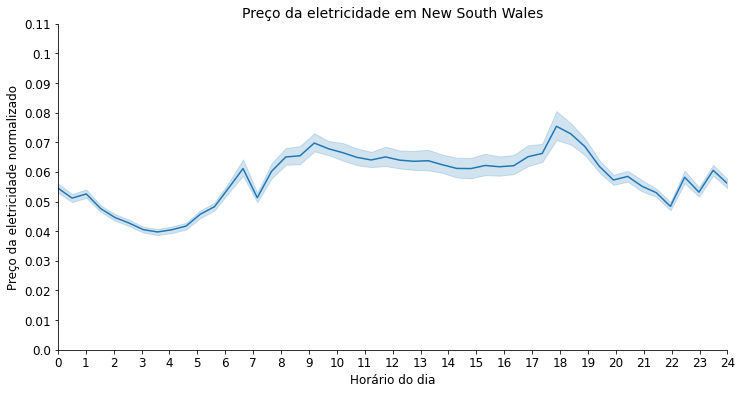

In [111]:
titulo = 'Preço da eletricidade em New South Wales'
ylabel = 'Preço da eletricidade normalizado'
maxy = 0.11
y = df['nswprice']
grafico_linhas(x, y, titulo, xlabel, ylabel, maxy=maxy)

O gráfico acima nos mostra um padrão comuns em centros urbanos. Como esperado, a partir da análise do gráfico de demanda, o valor da tarifa, durante a madrugada, é menor que no restante do dia. O maior pico de tarifca ocorre entre as 18 e 19 horas um pouco defasado em relação ao pico de demanda visto no gráfico anterior. No caso no preço da tarifa é observada uma maior variabilidade do que a vista para a demanda, já que a área sombreada é maior, em especial durante o período diurno. Isto indica que dependendo da época do ano a tarifa pode estar, em média, mais baixa ou mais alta, portanto ela pode ser mais susceptível a fatores externos do que a demanda.

O próximo gráfico mostra a variação da demanda ao longo da semana.

c:\Users\duart\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


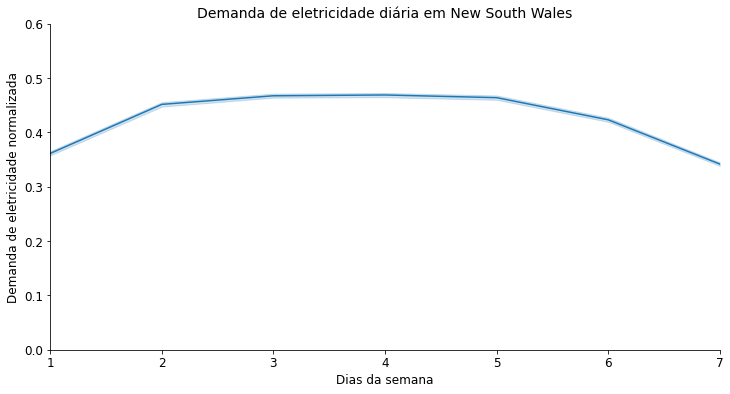

In [116]:
titulo = 'Demanda de eletricidade diária em New South Wales'
ylabel = 'Demanda de eletricidade normalizada'
xlabel = 'Dias da semana'
maxy = .6
stepy = .1
x = df['day']
y = df['nswdemand']
maxx = 7
minx = 1

grafico_linhas(x, y, titulo, xlabel, ylabel, minx=minx, maxx=maxx, maxy=maxy, stepy=stepy)

Considerando-se que o primeiro dia da semana seja domingo vê-se que, nesta cidade, as atividades que maior demanda de eletricidade ocorrem durante a semana. Pode-se levantar a hipótese que o principal responsável pelo aumento da demanda na cidade seja a atividade comercial.

Com esta análise inicial temos informações úteis sobre o perfil de consumo da população da cidade o que é útil para os gestores do sistema elétrico. O sistema elétrico têm de ser gerido de forma a garantir que a potência elétrica disponível na rede não seja muito acima ou abaixo da demanda. Caso um dos casos mencionados corre-se o risco de o sistema cair deixando vários clientes sem o fornecimento de energia elétrica, o que significa prejuízo para a companhia energética. Tendo-se a informação sobre o consumo médio dos clientes e períodos de pico a companhia já pode elaborar planos de operação preparados para atender a demanda prevista com a máxima eficiência possível.

Do lado do cliente sabendo-se em quais períodos do dia, em média, a fatura é mais alta ele pode tentar mudar seus horários de máximo consumo a fim de economizar na fatura. Indústrias podem por exemplo, quando possível, automatizar processos para serem executados durante o horário de menor tarifa.

## Criação do modelo de Machine Learning

### Análise da variável alvo

Após a análise exploratória dos dados o primeiro passo para a modelagem é entender a distribuição da variável alvo. Executando-se a célular a seguir é gerado um gráfico que mostra tal distribuição.

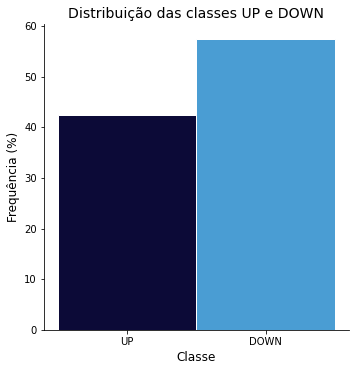

In [119]:
fig = sns.displot(data = df,
                  x = 'class', 
                  stat = 'percent', 
                  hue = 'class', 
                  palette = ['#0c0a37', '#4a9dd3'], 
                  alpha = 1, 
                  legend = False, 
                  edgecolor = '#ffffff')
fig.ax.set_ylabel('Frequência (%)', fontsize=12)
fig.ax.set_xlabel('Classe', fontsize=12)
fig.ax.set_title('Distribuição das classes UP e DOWN', fontsize=14)
plt.show()

O gráfico mostra que há mais períodos de fatura abaixo (**DOWN**) do que acima (**UP**) da média.

Utilizando-se o comando `value_counts`a seguir obtemos uma métrica mais precisa sobre a distribuição das classes.

In [120]:
df['class'].value_counts(normalize=True) * 100

DOWN    57.545463
UP      42.454537
Name: class, dtype: float64

Assim temos que 57,55% dos registros estão abaixo da média de 24 horas e 42,45% estão acima. Como existe um desbalanceamento será realizado mais adiante o balanceamento das classes. Pois, caso um modelo fosse treinado com estes dados e chuta-se sempre na classe **DOWN** ele teria uma acurácia (taxa de acertos) de 57,55%.

In [29]:
df['class'].value_counts()

DOWN    26075
UP      19237
Name: class, dtype: int64

### Seleção de variáveis

Para a composição do conjuntos de variáveis independentes (X) serão removidas as variáveis: `date`, `class`, `target`, `nswprice`, `vicprice`

A remoção da variável `date` é justificada porque cada data é única e como não há repetição de eventos um modelo que considere data como atributo terá dificuldades de realizar previsões fora do período em que foi treinado.

`class`e `target`foram removidas porque representam exatamente a variável de interesse.

`nswprice`e `vicprice`foram removidas pois o interesse é realizar a predição se a tarifa estará acima ou abaixo da média das últimas 24 horas. Para fazer esta classificação a variável `target` utiliza exatamente estas informações, porém, a ideia seria realizar a predição antes de se ter tal informação por isto tais variáveis foram removidas. Caso tive-se o valor de tais variáveis em mãos, no momento da predição, não seria necessário um modelo de predição, o simples cálculo das médias passadas comparado com o preço atual seria o suficiente.


In [4]:
X = df.drop(['date', 'class', 'target', 'nswprice', 'vicprice'], axis=1)
y = df['target']

### Balanceamento das classes

Como mostrado antetiormente existe um desbalanceamento das classes. Este deslabanceamento pode compromoter o desempenho do modelo pois isto pode torná-lo tendencioso a gerar mais predições para a classe predominante. Para lidar com o desbalanceamento uma das metodologias que pode ser adotadas é o `undersampling`. No undersampling o número de registros da classe dominante é diminuido para que fique igual ao da classe de menor frequência. É esperado, que com o equilíbrio das classes, o modelo torne-se menos tendencioso para uma determinada classe. Um cuidado que deve-se tomar com o undersampling é causar uma grande diminuição das amostras, o que também pode comprometer o desempenho do modelo. Mas como este dataset têm uma quansidade considerável de registros mesmo com a redução de tamanho ainda ficarão 19237 registros para cada uma das classes.

Para lidar com classes desbalanceadas existe a biblioteca `imbalanced-learn` esta biblioteca foi derivada do Scikit Learn e como o nome sugere contém métodos para lidar com classes desbalanceadas. Entre os métodos disponíveis está o `RandomUnderSampler` que realiza a diminuição da classe de maior frequência selecionando amostras de forma aleatória.

In [30]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=101)

X_rus, y_rus = rus.fit_resample(X, y)

print(y_rus.value_counts())

0    19237
1    19237
Name: target, dtype: int64


### Validação cruzada

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

skf = StratifiedKFold(n_splits=10)

#### Descrição do modelo Random Forest

Para entender-se o modelo de Random Forest ou Floresta Aleatória é preciso primeiro entender o modelo de Árvore de Decisão

##### Árvore de Decisão

Árvores de decisão são um conjuntos de "SE ENTÃO" que descrevem uma sequência de passos para classificar uma amostra. A estrutura de uma árvore é divididad em nós, ramos e folhas. O nós representam testes lógicos que casos positvos derivam para um ramo e caso negativos para outro ramo. Ramos são agrupamentos de de nós e folhas. As folhas são o final da árvore a resposta final do modelo. A divisão dos nós é feita utilizando um algoritmo recursivo de que busca minimizar a quantidade de impurezas em cada ramo da árvore. Esta otimização pode ser feita buscando-se diminuir um dos seguintes índices: impureza de gini e a entropia. Ambas as métricas quantificam a quantidade de impurezas (dados que não pertençam a uma classe pré-determinada) de uma amostra.

#### Random Forest

O algoritmo de Random Forest consiste na construção de várias Árvores de Decisão simultaneamente. A resposta final do modelo é, no caso de modelos de classificação, a moda das predições realizadas pelo conjunto. A ideia deste modelo é que a geralmente a média de um conjunto de previsões é melhor que a previsão individual de um único modelo. 

In [32]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=101)

#### Métricas de avaliação

#### Resultado

In [33]:
def executa_modelo():
    cv_results = cross_validate(RFC, X_rus, y_rus, cv=skf, scoring=['accuracy', 'precision', 'recall'])

    acuracia_media = cv_results['test_accuracy'].mean()
    precisao_media = cv_results['test_precision'].mean()
    recall_media = cv_results['test_recall'].mean()

    acuracia_desvio_padrao = cv_results['test_accuracy'].std()
    precisao_desvio_padrao = cv_results['test_precision'].std()
    recall_desvio_padrao = cv_results['test_recall'].std()

    print('Resultados:')
    print('='*80)
    print('Acurácia:')
    print('Média = %.2f' % acuracia_media)
    print('Intervalo de confiança de 95%%: %.2f a %.2f' % (acuracia_media - 2 * acuracia_desvio_padrao, acuracia_media + 2 * acuracia_desvio_padrao))
    print('Precisão:')
    print('Média = %.2f' % precisao_media)
    print('Intervalo de confiança de 95%%: %.2f a %.2f' % (precisao_media - 2 * precisao_desvio_padrao, precisao_media + 2 * precisao_desvio_padrao))
    print('Recall:')
    print('Média = %.2f' % acuracia_media)
    print('Intervalo de confiança de 95%%: %.2f a %.2f' % (recall_media - 2 * recall_desvio_padrao, recall_media + 2 * recall_desvio_padrao))

In [34]:
executa_modelo()

Resultados:
Acurácia:
Média = 0.61
Intervalo de confiança de 95%: 0.57 a 0.64
Precisão:
Média = 0.63
Intervalo de confiança de 95%: 0.60 a 0.66
Recall:
Média = 0.61
Intervalo de confiança de 95%: 0.43 a 0.59


Otimização do modelo

O resultado obtido anteriormente foi obtido utilizando-se as configurações padrões do modelo `RandomForestClassifier` do Scikit Learn. Porém, é possível alterar parâmetros do modelo para otimizá-lo, buscando melhores resultados. Por motivos de limitação computacional aqui serão testados três parâmetros do modelo listados a seguir:
* `criterion` : Específica o critério para o cálculo da impureza existente em cada ramo. Podem ser utilizadas duas métricas: entropia ou gini.
* `max_depth` : Refere-se a profundidade máxima da árvore. Controla a quantidade de níveis máximos que a árvore pode ter, poda. Como a probabilidade de overfiting aumenta com a profundidade da árvore o ajuste deste parâmetro pode evitar que isto ocorra.
* `min_samples_split` : Quantidade mínima de amostras para dividir um nó. Por padrão é utilizado o valor 2.

Para automatizar o processo de busca do melhor conjunto de parâmetros será utilizada a funcção `GridSeachCV`. Este método realiza uma busca entre todas as combinações possíveis dos parâmetros fornecidos. Ele realiza uma pesquisa na grade de parâmetros fornecida otimizando e seleciona o melhor estimador por validação cruzada utilizando por padrão a acurácia.  

In [35]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5, 10, 15, 20],
    'min_samples_split' : [2, 4, 8],
}
RFC = RandomForestClassifier(random_state=101, n_jobs=-1)
clf = GridSearchCV(RFC, parametros, cv=skf, n_jobs=-1)
clf.fit(X_rus, y_rus)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_split': [2, 4, 8]})

In [36]:
acuracia_media = clf.best_score_
desvio_padrao_medio = clf.cv_results_['std_test_score'].mean()

print('Melhor estimador possível dentro do conjunto de parâmetros fornecido:')
print(clf.best_estimator_)
print('Acurácia média = {:.2f}'.format(clf.best_score_))
print('Intervalo de confiança de 95% : {:.2f} a {:.2f}'.format(acuracia_media - 2 * desvio_padrao_medio,
                                                               acuracia_media + 2 * desvio_padrao_medio))


Melhor estimador possível dentro do conjunto de parâmetros fornecido:
RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=101)
Acurácia média = 0.63
Intervalo de confiança de 95% : 0.56 a 0.70


### Conclusões

O modelo de Random Forest implementado foi capaz de prever a classe da tarifa com acurácia média de 0,63 e intervalo de confiança, a nível de 95%, entre 0,56 e 0,70. O valor de acurácia mínimo de 0,56 mostra que no pior dos cenários o modelo criado ainda seria melhor que uma predição aleatória. Com o uso da validação cruzada pode-se identificar, de forma mais precisa, qual o real desempenho do modelo. Pois, selecionando-se apenas uma amostra aleatória é possível selecionar um conjunto que seja muito fácil para prever o resultado o que é refletido em um alto valor de acurácia no induzindo a achar que o modelo têm uma alta performance.